In [9]:
# 这里我们使用facebook发布的时间序列自动预测程序包prophet进行预测
library(prophet)
library(dplyr)
library(readr)

In [75]:
# 载入数据并拟合模型
df <- read_csv("clean_train_data.csv")
colnames(df) <- c('ds', 'y')
df_train <- df[1:(length(df$ds)-6),]
m <- prophet(df_train)
future <- make_future_dataframe(m, periods = 6, freq = 'm')

m <- prophet(weekly.seasonality=FALSE,daily.seasonality = FALSE,changepoint.prior.scale = 0.6,
            seasonality.prior.scale = 60)
m <- add_seasonality(m, name='monthly', period=30.5, fourier.order=5)
m <- fit.prophet(m, df)         
tail(future,6)

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  Num = col_double()
)
Disabling weekly seasonality. Run prophet with weekly.seasonality=TRUE to override this.
Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.


Initial log joint probability = -2.72114
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -2.54023
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


,ds
148,2017-04-01
149,2017-05-01
150,2017-06-01
151,2017-07-01
152,2017-08-01
153,2017-09-01


,ds,yhat,yhat_lower,yhat_upper
148,2017-04-01,1101.397,1011.8759,1206.047
149,2017-05-01,1071.929,977.9992,1164.909
150,2017-06-01,1088.002,990.3299,1180.743
151,2017-07-01,1284.596,1192.2074,1373.304
152,2017-08-01,1311.182,1214.3422,1407.092
153,2017-09-01,1135.185,1039.7459,1227.808


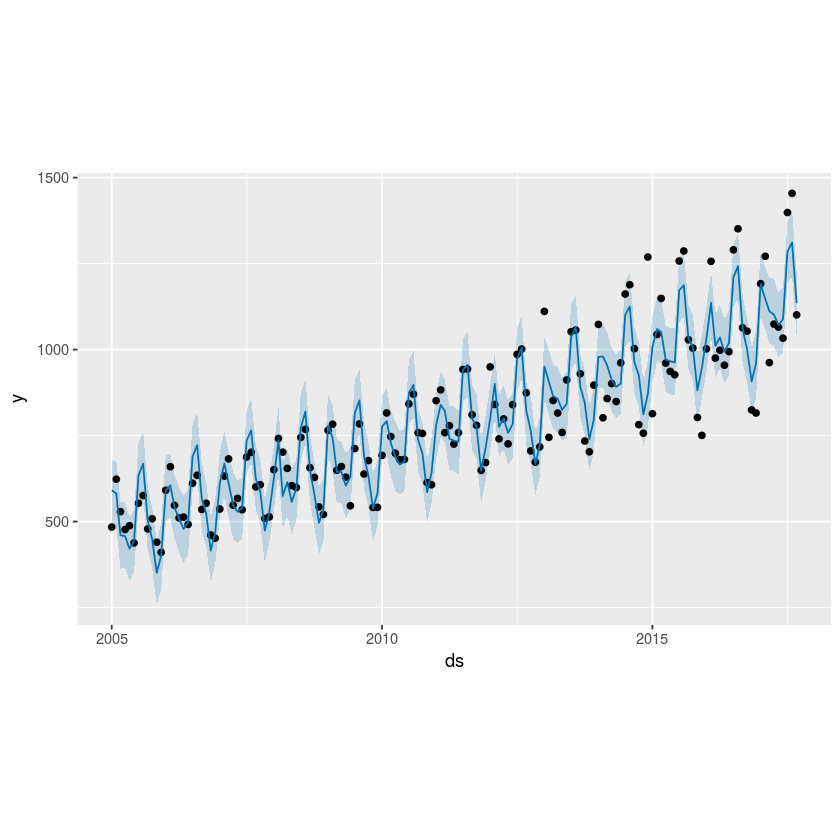

In [76]:
# 进行预测
forecast <- predict(m, future)
tail(forecast[c('ds', 'yhat', 'yhat_lower', 'yhat_upper')], 6)
plot(m, forecast)

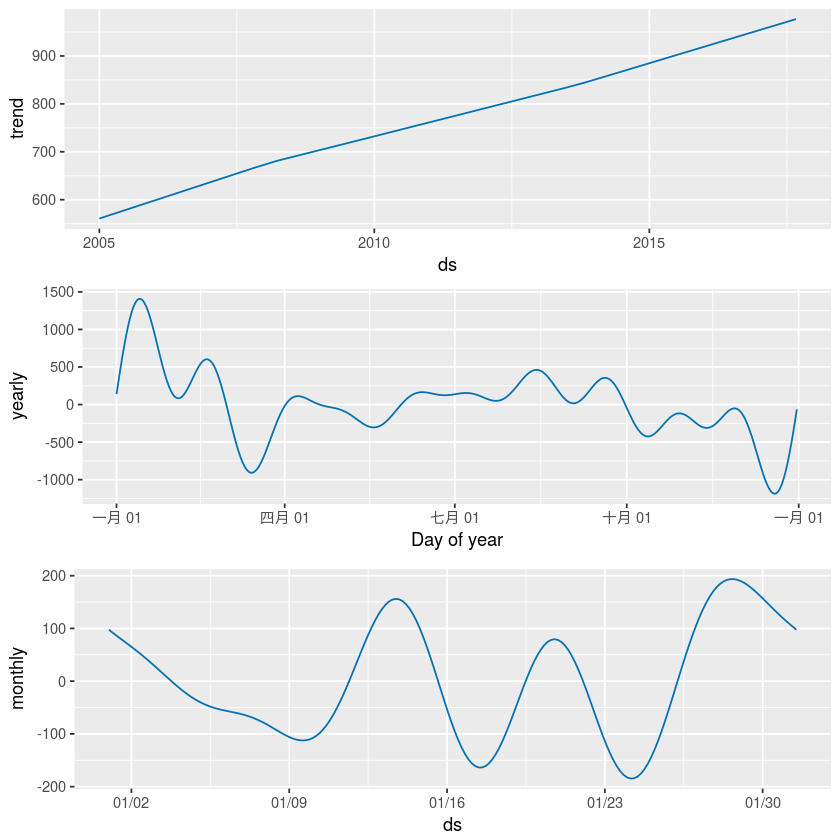

In [77]:
# 趋势分解
prophet_plot_components(m, forecast)

In [78]:
# 误差分析
train.data <- read_csv("clean_train_data.csv")

train.ts <- ts(train.data$Num, start = c(2005,1), end=c(2017, 9),
              frequency = 12)
fore_true <- window(train.ts, start=c(2017, 4), end=c(2017, 9))
fore_true
fore_pred <- tail(forecast$yhat, 6)
fore_pred
rmse <- sqrt(mean((fore_true-fore_pred)^2))
rmse

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  Num = col_double()
)


         Apr     May     Jun     Jul     Aug     Sep
2017 1074.04 1065.21 1033.15 1398.55 1454.20 1100.96

[1] 1101.397 1071.929 1088.002 1284.596 1311.182 1135.185

[1] 80.01382